In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import datetime
import json

In [2]:
from api_keys import api_key

In [3]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [4]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

In [5]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [6]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

In [7]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)

In [8]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

In [9]:
# Print the city count to confirm sufficient count
print(len(cities))

749


# Perform API Calls

Perform a weather check on each city using a series of successive API calls.

Include a print log of each city as it'sbeing processed (with the city number and city name).

In [10]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


In [11]:
lattitude_lst = []
windspeed_lst = []
humidity_lst = []
cloudiness_lst = []
temperature_lst = []
name_lst = []
number = 1

In [12]:
for city in cities:
    try:
        query_url = f"{url}appid={api_key}&units={units}&q={city}"
        response = requests.get(query_url).json()
        lattitude_lst.append(response['coord']['lat'])
        windspeed_lst.append(response['wind']['speed'])
        humidity_lst.append(response['main']['humidity'])
        cloudiness_lst.append(response['clouds']['all'])
        temperature_lst.append(response['main']['temp'])
        name_lst.append(city.title())
        print(f'City number {number} is {city.title()}')
        number += 1
    except:
        number -= 1
    if number > 500:
        break

City number 1 is rikitea
City number 2 is ribeira grande
City number 3 is nyurba
City number 4 is suvorovskaya
City number 5 is bathsheba
City number 6 is iqaluit
City number 7 is ilulissat
City number 8 is vaini
City number 9 is jamestown
City number 10 is bonito
City number 10 is bluff
City number 10 is yar-sale
City number 11 is cape town
City number 12 is yenagoa
City number 13 is ushuaia
City number 14 is barrow
City number 15 is nicoya
City number 16 is nanortalik
City number 17 is busselton
City number 18 is karratha
City number 19 is mataura
City number 20 is punta arenas
City number 21 is naze
City number 22 is cuamba
City number 23 is socorro
City number 24 is somerset east
City number 25 is avarua
City number 26 is thompson
City number 27 is samarai
City number 28 is olinda
City number 29 is georgetown
City number 30 is nishihara
City number 31 is upernavik
City number 32 is cidreira
City number 32 is grindavik
City number 33 is chuy
City number 34 is geraldton
City number 3

City number 260 is narsaq
City number 261 is bilma
City number 262 is goderich
City number 263 is buin
City number 263 is boda
City number 264 is talnakh
City number 265 is lukang
City number 266 is abay
City number 267 is verkhnevilyuysk
City number 268 is cristalina
City number 269 is lac du bonnet
City number 270 is tual
City number 269 is razdolinsk
City number 269 is evensk
City number 270 is gubkinskiy
City number 271 is east london
City number 272 is aldan
City number 273 is starobesheve
City number 274 is mount isa
City number 275 is seguela
City number 275 is pangai
City number 276 is aginskoye
City number 277 is diffa
City number 278 is didwana
City number 278 is toktogul
City number 279 is uberaba
City number 280 is serenje
City number 281 is camacha
City number 282 is port hardy
City number 283 is atasu
City number 284 is shimoda
City number 285 is dauriya
City number 286 is maues
City number 287 is alofi
City number 288 is airai
City number 289 is port lincoln
City number 

 # Convert Raw Data to DataFrame

Export the city data into a .csv.

Display the DataFrame

In [13]:
df = pd.DataFrame({'City': name_lst, 'Lattitude': lattitude_lst, 'Windspeed': windspeed_lst, 'Humidity':humidity_lst, 'Cloudiness':cloudiness_lst, 'Temperature': temperature_lst})
df.head()

,City,Lattitude,Windspeed,Humidity,Cloudiness,Temperature
0,rikitea,-23.12,18.99,80,67,76.08
1,ribeira grande,38.52,17.92,90,100,60.58
2,nyurba,63.29,1.25,98,100,-14.55
3,suvorovskaya,44.19,6.71,92,75,17.24
4,bathsheba,13.22,10.29,78,40,77.00


In [14]:
df.to_csv('weather_data.csv', index = False)

# Plotting the Data

Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

Latitude vs. Temperature Plot

Text(0, 0.5, 'Temperature (F)')

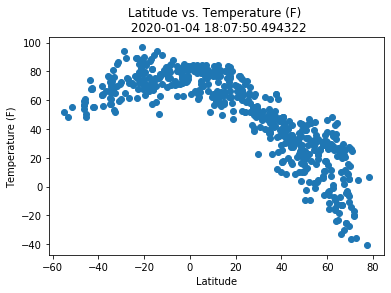

In [31]:
plt.scatter(df['Lattitude'], df['Temperature'])
now = datetime.now()
plt.title(f'Latitude vs. Temperature (F) \n {now}')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.savefig('latvtemp.png')

Latitude vs. Humidity Plot

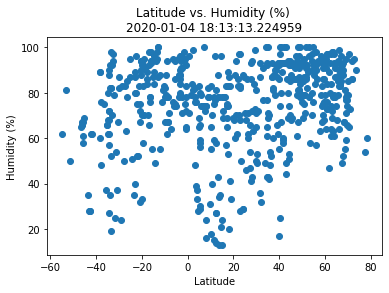

In [34]:
plt.scatter(df['Lattitude'], df['Humidity'])
now = datetime.now()
plt.title(f'Latitude vs. Humidity (%) \n{now}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('latvhumidity.png')

Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

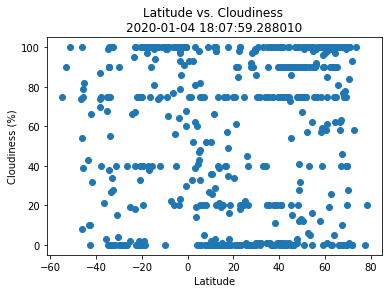

In [33]:
plt.scatter(df['Lattitude'], df['Cloudiness'])
now = datetime.now()
plt.title(f'Latitude vs. Cloudiness \n{now}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

Latitude vs. Wind Speed Plot


Text(0, 0.5, 'Wind Speed (mph)')

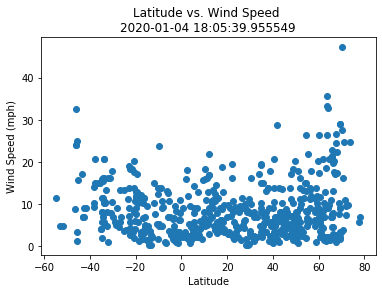

In [29]:
plt.scatter(df['Lattitude'], df['Windspeed'])
now = datetime.now()
plt.title(f'Latitude vs. Wind Speed \n{now}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Three Observable Trends

1. The temperature tends to increase as you approach 0 (the equator)
2. It appears as if there is no relationship between cloudiness and latitude
3. It appears as if there is no relationship between latitude and windspeed